In [7]:
from opensoundscape.preprocess.preprocessors import BasePreprocessor
import torch
import pandas as pd
from pathlib import Path
import numpy as np
import pandas as pd
from opensoundscape.torch.models import cnn
from opensoundscape.torch.architectures import cnn_architectures
from opensoundscape.torch.models.cnn import load_model

In [9]:
model = load_model("C:/Users/Siloux/Desktop/E4E/passive-acoustic-biodiversity/OpenSoundScape/MultiClass Classifier/multilabel_train_seven_classes_xeno_canto/best.model")#'best.model')

AttributeError: Can't get attribute '_unpickle_block' on <module 'pandas._libs.internals' from 'C:\\Users\\Siloux\\.conda\\envs\\species-id\\lib\\site-packages\\pandas\\_libs\\internals.cp37-win_amd64.pyd'>

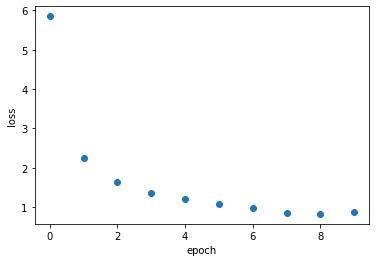

In [3]:
import matplotlib.pyplot as plt
plt.scatter(model.loss_hist.keys(),model.loss_hist.values())
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [4]:
ef = pd.read_csv('xeno_canto_test_none.csv')
ef.drop(columns='Unnamed: 0', inplace=True)

In [5]:
df_test = pd.read_csv('peru_test_data.csv')
df_test.drop(columns='Unnamed: 0', inplace=True)

In [6]:
# ef

In [7]:
# df_test
testDF = ef.append(df_test, ignore_index=True)
testDF['MANUAL ID'].value_counts()

/var/folders/km/7_v861mx0cb9fp42nvllkmt00000gn/T/ipykernel_44975/2698475132.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  testDF = ef.append(df_test, ignore_index=True)


None                         4073
White-throated Toucan         107
Ihering's Antwren             102
Red-eyed Vireo                 98
Brassy-breasted Tanager        91
Eastern Kingbird               85
White-bellied Tody-Tyrant      83
Charming Hummingbird           26
Bluish-slate Antshrike         25
Chivi Vireo                     4
Name: MANUAL ID, dtype: int64

In [8]:
testDF.loc[testDF['MANUAL ID'].str.contains('Toucan'), 'MANUAL ID'] = 'Toucan'
testDF.loc[testDF['MANUAL ID'].str.contains('Vireo'), 'MANUAL ID'] = 'Vireo'
testDF.loc[testDF['MANUAL ID'].str.contains('Antwren'), 'MANUAL ID'] = 'Antwren'
testDF.loc[testDF['MANUAL ID'].str.contains('Tanager'), 'MANUAL ID'] = 'Tanager'
testDF.loc[testDF['MANUAL ID'].str.contains('Kingbird'), 'MANUAL ID'] = 'Kingbird'
testDF.loc[testDF['MANUAL ID'].str.contains('Tody-Tyrant'), 'MANUAL ID'] = 'Tody-Tyrant'
testDF.loc[testDF['MANUAL ID'].str.contains('Hummingbird'), 'MANUAL ID'] = 'Hummingbird'
testDF.loc[testDF['MANUAL ID'].str.contains('Antshrike'), 'MANUAL ID'] = 'Antshrike'

classes = ['Antwren', 'Antshrike', 'Toucan', 'Vireo', 'Kingbird', 'Tody-Tyrant', 'None']
for i, row in testDF.iterrows():
    if(row['MANUAL ID'] not in classes):
        testDF.drop(i, inplace=True)

In [9]:
from opensoundscape.annotations import categorical_to_one_hot
one_hot_labels, testClasses = categorical_to_one_hot(testDF[['MANUAL ID']].values)
testDF = pd.DataFrame(index=testDF['file'],data=one_hot_labels,columns=testClasses)
testDF = testDF.reindex(columns=model.classes)
testDF

,None,Tody-Tyrant,Vireo,Kingbird,Toucan,Antwren,Antshrike
file,,,,,,,
./temp_clips/../XenoCanto_Data/Training_Xeno_Canto_2022/Hemitriccus-griseipectus-11801_0.0s_3.0s.wav,0,1,0,0,0,0,0
./temp_clips/../XenoCanto_Data/Training_Xeno_Canto_2022/Hemitriccus-griseipectus-11801_3.0s_6.0s.wav,0,1,0,0,0,0,0
./temp_clips/../XenoCanto_Data/Training_Xeno_Canto_2022/Hemitriccus-griseipectus-11801_6.0s_9.0s.wav,0,1,0,0,0,0,0
./temp_clips/../XenoCanto_Data/Training_Xeno_Canto_2022/Hemitriccus-griseipectus-11801_9.0s_12.0s.wav,0,1,0,0,0,0,0
./temp_clips/../XenoCanto_Data/Training_Xeno_Canto_2022/Hemitriccus-griseipectus-11801_12.0s_15.0s.wav,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
./temp_clips/../../Datasets/peru_data/Audiomoth_Madre_de_Dios_Field_Recordings/All/AM1_samples_split/20190621_175000_16_0.0s_3.0s.wav,1,0,0,0,0,0,0
./temp_clips/../../Datasets/peru_data/Audiomoth_Madre_de_Dios_Field_Recordings/All/AM1_samples_split/20190701_084000_1_0.0s_3.0s.wav,1,0,0,0,0,0,0
./temp_clips/../../Datasets/peru_data/Audiomoth_Madre_de_Dios_Field_Recordings/All/AM1_samples_split/20190624_074000_14_0.0s_3.0s.wav,1,0,0,0,0,0,0


In [11]:
model.classes

['Tody-Tyrant', 'Antshrike', 'Kingbird', 'Vireo', 'Antwren', 'Toucan', 'None']

In [12]:
testClasses

['None', 'Tody-Tyrant', 'Vireo', 'Kingbird', 'Toucan', 'Antwren', 'Antshrike']

In [13]:
prediction_dataset = model.train_dataset.sample(n=0)
prediction_dataset.augmentation_off()
prediction_dataset.df = testDF

In [14]:
valid_scores_df, valid_preds_df, valid_labels_df = model.predict(prediction_dataset,
                                                                 binary_preds='single_target',
                                                                 batch_size=16,
                                                                 num_workers=2,
                                                                 activation_layer='softmax')

(4577, 7)


In [15]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
print(classification_report(valid_labels_df, valid_preds_df))

              precision    recall  f1-score   support

           0       0.74      0.94      0.83        83
           1       0.00      0.00      0.00        25
           2       0.58      0.96      0.73        85
           3       0.79      0.97      0.87       102
           4       0.69      0.81      0.75       102
           5       0.30      1.00      0.46       107
           6       1.00      0.92      0.96      4073

   micro avg       0.91      0.91      0.91      4577
   macro avg       0.59      0.80      0.66      4577
weighted avg       0.95      0.91      0.93      4577
 samples avg       0.91      0.91      0.91      4577



/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
testDF.columns

Index(['Tody-Tyrant', 'Antshrike', 'Kingbird', 'Vireo', 'Antwren', 'Toucan',
       'None'],
      dtype='object')

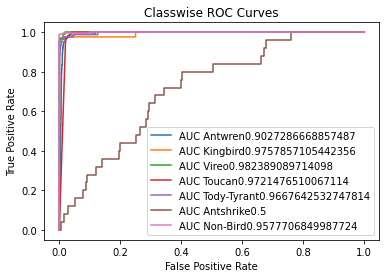

In [17]:
fpr, tpr, thresh = roc_curve(valid_labels_df['Antwren'],  valid_scores_df['Antwren'])
auc = roc_auc_score(valid_labels_df['Antwren'],  valid_preds_df['Antwren'])

fpr2, tpr2, thresh2 = roc_curve(valid_labels_df['Kingbird'],  valid_scores_df['Kingbird'])
auc2 = roc_auc_score(valid_labels_df['Kingbird'],  valid_preds_df['Kingbird'])

fpr3, tpr3, thresh3 = roc_curve(valid_labels_df['Vireo'],  valid_scores_df['Vireo'])
auc3 = roc_auc_score(valid_labels_df['Vireo'],  valid_preds_df['Vireo'])

fpr4, tpr4, thresh4 = roc_curve(valid_labels_df['Toucan'],  valid_scores_df['Toucan'])
auc4 = roc_auc_score(valid_labels_df['Toucan'],  valid_preds_df['Toucan'])

fpr5, tpr5, thresh5 = roc_curve(valid_labels_df['Tody-Tyrant'],  valid_scores_df['Tody-Tyrant'])
auc5 = roc_auc_score(valid_labels_df['Tody-Tyrant'],  valid_preds_df['Tody-Tyrant'])

fpr6, tpr6, thresh6 = roc_curve(valid_labels_df['Antshrike'],  valid_scores_df['Antshrike'])
auc6 = roc_auc_score(valid_labels_df['Antshrike'],  valid_preds_df['Antshrike'])

fpr7, tpr7, thresh7 = roc_curve(valid_labels_df['None'],  valid_scores_df['None'])
auc7 = roc_auc_score(valid_labels_df['None'],  valid_preds_df['None'])

plt.plot(fpr,tpr,label="AUC Antwren"+str(auc))
plt.plot(fpr2,tpr2,label="AUC Kingbird"+str(auc2))
plt.plot(fpr3,tpr3,label="AUC Vireo"+str(auc3))
plt.plot(fpr4,tpr4,label="AUC Toucan"+str(auc4))
plt.plot(fpr5,tpr5,label="AUC Tody-Tyrant"+str(auc5))
plt.plot(fpr6,tpr6,label="AUC Antshrike"+str(auc6))
plt.plot(fpr7,tpr7,label="AUC Non-Bird"+str(auc7))
plt.title('Classwise ROC Curves')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()